# Machine Learning Basics! Part Deux

**The mother of all sequels!**

## Some Sample Data

For some the following discussion, it will be useful to have some example data to work with.

In [ ]:
run(`mkdir -p /srv/notebooks/data`)
run(`curl -s https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data --output /srv/notebooks/data/iris.data`)

In [1]:
using CSV
using DataFrames
using Plots
using StatPlots

plotly()

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1186


Plots.PlotlyBackend()

In [20]:
iris = CSV.read("data/iris.data", header=[:SepalLength, :SepalWidth, :PetalLength, :PetalWidth, :Species])

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,String⍰
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


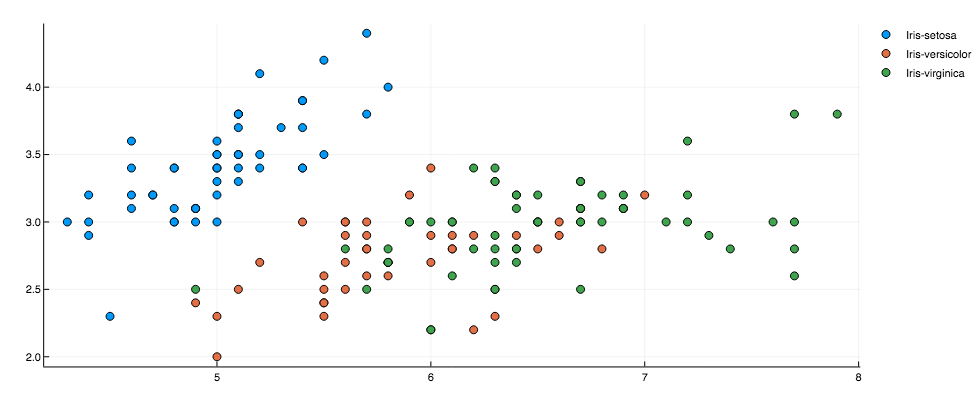

In [21]:
@df iris scatter(:SepalLength,:SepalWidth,group=:Species)

## Capacity, Overfitting, and Underfitting

- generalization error (a.k.a. test error)
  - the ability to perform well on previously unobserved inputs
- underfitting
  - model is not able to obtain a sufficiently low training error
- overfitting
  - the gap between training error and test error is to large
- regularization
  - a modification to a learning algorithm intended to reduce test error *but not its training error*
  - linear regression w/ weight decay is an example

## Hyperparameters and Validation Sets

- hyperparameters are settings that control the learning algorithms behavior *but not adapted by the learning algorithm itself*
  - linear regression: the weights are adapted by the learning algorithm but the number of weights is not
  - weight decay
- validation set
  - examples for making choices about hyperparameters
  - not seen by the training algorithm
  - constructed from the training set (?)
- cross-validation
  - for small datasets, dividing into training and test can be problematic
  - $k$-fold cross validation is most common
    - partition the dataset into k disjoint sets
    - on trial $i$, use partition $i$ to estimate test error and train on all other partitions

In [72]:
x = convert(Array, iris[iris[:Species] .== "Iris-setosa", :SepalWidth])
X = hcat(x, ones(50, 1))
y = convert(Array, iris[iris[:Species] .== "Iris-setosa", :SepalLength])
w = inv(X' * X) * X' * y

scatter(x, y)
plot!(x, X*w)

sum((y - X*w).^2) / length(y)

0.05385853973966097

In [73]:
x = convert(Array, iris[iris[:Species] .== "Iris-setosa", :SepalWidth])
X = hcat(x, x .^ 2, x.^3, x.^4, ones(50, 1))
y = convert(Array, iris[iris[:Species] .== "Iris-setosa", :SepalLength])
w = inv(X' * X) * X' * y

scatter(x, y)
scatter!(x, X*w)

sum((y - X*w).^2) / length(y)

0.051709977491381315

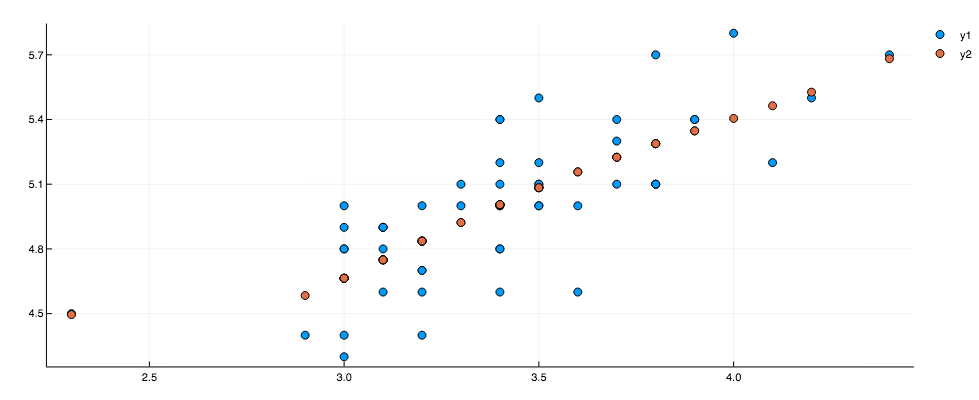

## Estimators, Bias, and Variance

- bias
  - the difference between the expected value of an estimator and the true value of the parameter being estimated
- variance
  - how wide is the spread of our estimator
- consider a game of darts
  - bias is like the average distance from the bullseye
  - variance is the average distance between throws

## Maximum Likelihood Estimation

- our estimate for a parameter is the value that maximizes the probablitity of generating the observed data with selected model
  - given a sequence of coin flips, the MLE for the probability of heads is the number of heads / number of flips

# Bayesian Statistics

- typically generalize better w/ limited training data
- high computation cost
- maximum a posteriori estimation
  - choose the parameter value with the highest probablity given the data
